# Smoke Detection with Random Forest

In [12]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import os

for dirname, _, filenames in os.walk("../smoke-detection-dataset"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../smoke-detection-dataset\smoke_detection_iot.csv


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    f1_score,
    precision_score,
    recall_score,
    roc_auc_score,
    roc_curve,
)

In [14]:
import warnings

warnings.simplefilter("ignore")

In [15]:
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.2f}".format

In [16]:
df = pd.read_csv(r"../smoke-detection-dataset/smoke_detection_iot.csv")

In [17]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.00,57.36,0,400,12306,18520,939.74,0.00,0.00,0.00,0.00,0.00,0,0
1,1,1654733332,20.02,56.67,0,400,12345,18651,939.74,0.00,0.00,0.00,0.00,0.00,1,0
2,2,1654733333,20.03,55.96,0,400,12374,18764,939.74,0.00,0.00,0.00,0.00,0.00,2,0
3,3,1654733334,20.04,55.28,0,400,12390,18849,939.74,0.00,0.00,0.00,0.00,0.00,3,0
4,4,1654733335,20.06,54.69,0,400,12403,18921,939.74,0.00,0.00,0.00,0.00,0.00,4,0


In [18]:
df.shape

(62630, 16)

In [19]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
UTC,62630.00,1654792066.18,110002.49,1654712187.00,1654743244.25,1654761919.50,1654777576.75,1655130051.00
Temperature[C],62630.00,15.97,14.36,-22.01,10.99,20.13,25.41,59.93
Humidity[%],62630.00,48.54,8.87,10.74,47.53,50.15,53.24,75.20
TVOC[ppb],62630.00,1942.06,7811.59,0.00,130.00,981.00,1189.00,60000.00
eCO2[ppm],62630.00,670.02,1905.89,400.00,400.00,400.00,438.00,60000.00
Raw H2,62630.00,12942.45,272.46,10668.00,12830.00,12924.00,13109.00,13803.00
Raw Ethanol,62630.00,19754.26,609.51,15317.00,19435.00,19501.00,20078.00,21410.00
Pressure[hPa],62630.00,938.63,1.33,930.85,938.70,938.82,939.42,939.86
PM1.0,62630.00,100.59,922.52,0.00,1.28,1.81,2.09,14333.69
PM2.5,62630.00,184.47,1976.31,0.00,1.34,1.88,2.18,45432.26


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [22]:
df.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [23]:
duplicate_rows = df[df.duplicated()]
print("No. of duplicate rows: ", duplicate_rows.shape[0])

No. of duplicate rows:  0


In [24]:
for col in df.columns:
    print("Column name - ", col)
    print("Mean: {:.2f}".format(df[col].mean()))
    print("Std: {:.2f}".format(df[col].std()))

Column name -  UTC
Mean: 1654792066.18
Std: 110002.49
Column name -  Temperature[C]
Mean: 15.97
Std: 14.36
Column name -  Humidity[%]
Mean: 48.54
Std: 8.87
Column name -  TVOC[ppb]
Mean: 1942.06
Std: 7811.59
Column name -  eCO2[ppm]
Mean: 670.02
Std: 1905.89
Column name -  Raw H2
Mean: 12942.45
Std: 272.46
Column name -  Raw Ethanol
Mean: 19754.26
Std: 609.51
Column name -  Pressure[hPa]
Mean: 938.63
Std: 1.33
Column name -  PM1.0
Mean: 100.59
Std: 922.52
Column name -  PM2.5
Mean: 184.47
Std: 1976.31
Column name -  NC0.5
Mean: 491.46
Std: 4265.66
Column name -  NC1.0
Mean: 203.59
Std: 2214.74
Column name -  NC2.5
Mean: 80.05
Std: 1083.38
Column name -  CNT
Mean: 10511.39
Std: 7597.87
Column name -  Fire Alarm
Mean: 0.71
Std: 0.45


In [25]:
import scipy.stats as stats


def diagnostic_plot(data, col):
    fig = plt.figure(figsize=(20, 5))
    fig.subplots_adjust(right=1.5)

    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color="pink")
    plt.title("Histogram")

    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist="norm", fit=True, plot=plt)
    plt.title("Q-Q Plot")

    plt.subplot(1, 3, 3)
    sns.boxplot(data[col], color="pink")
    plt.title("Box Plot")

    plt.show()

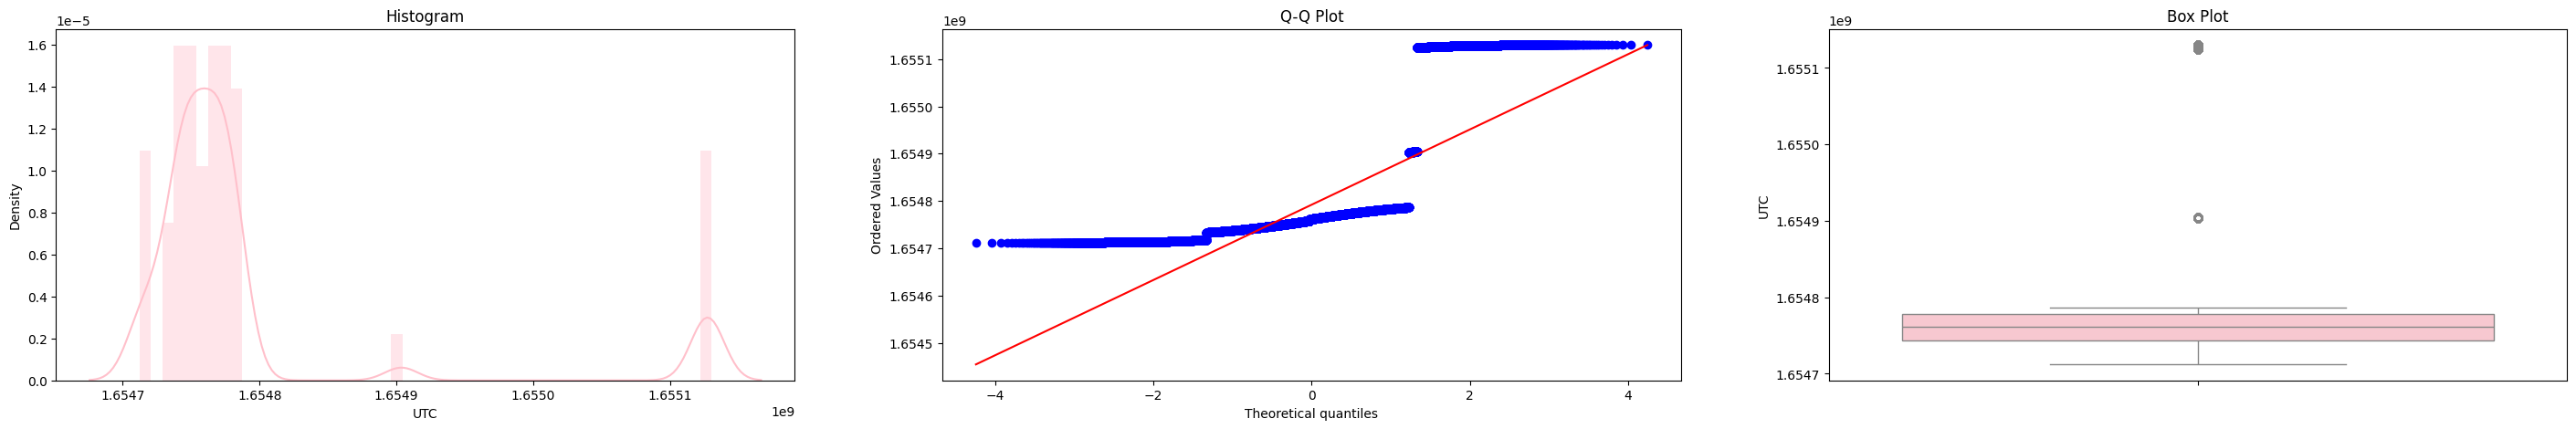

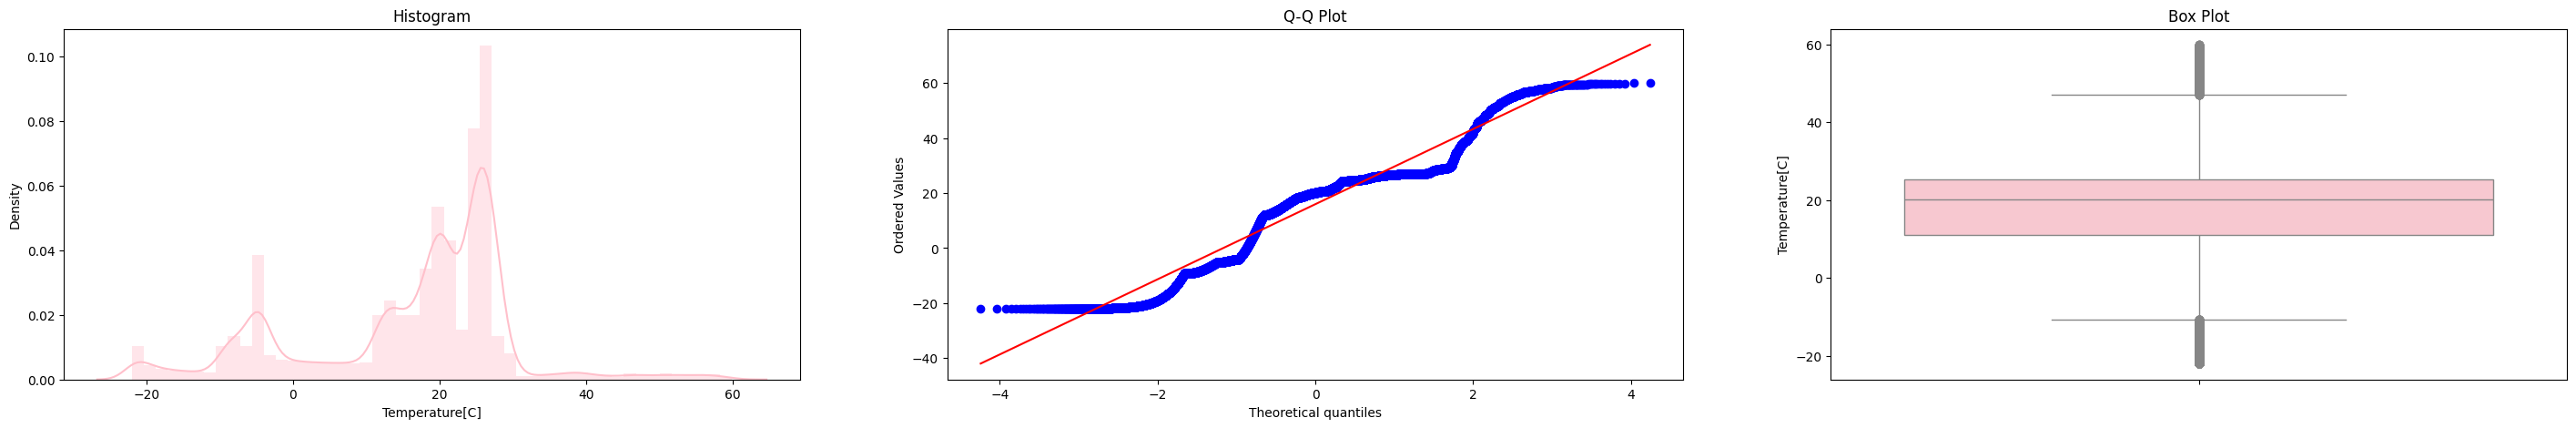

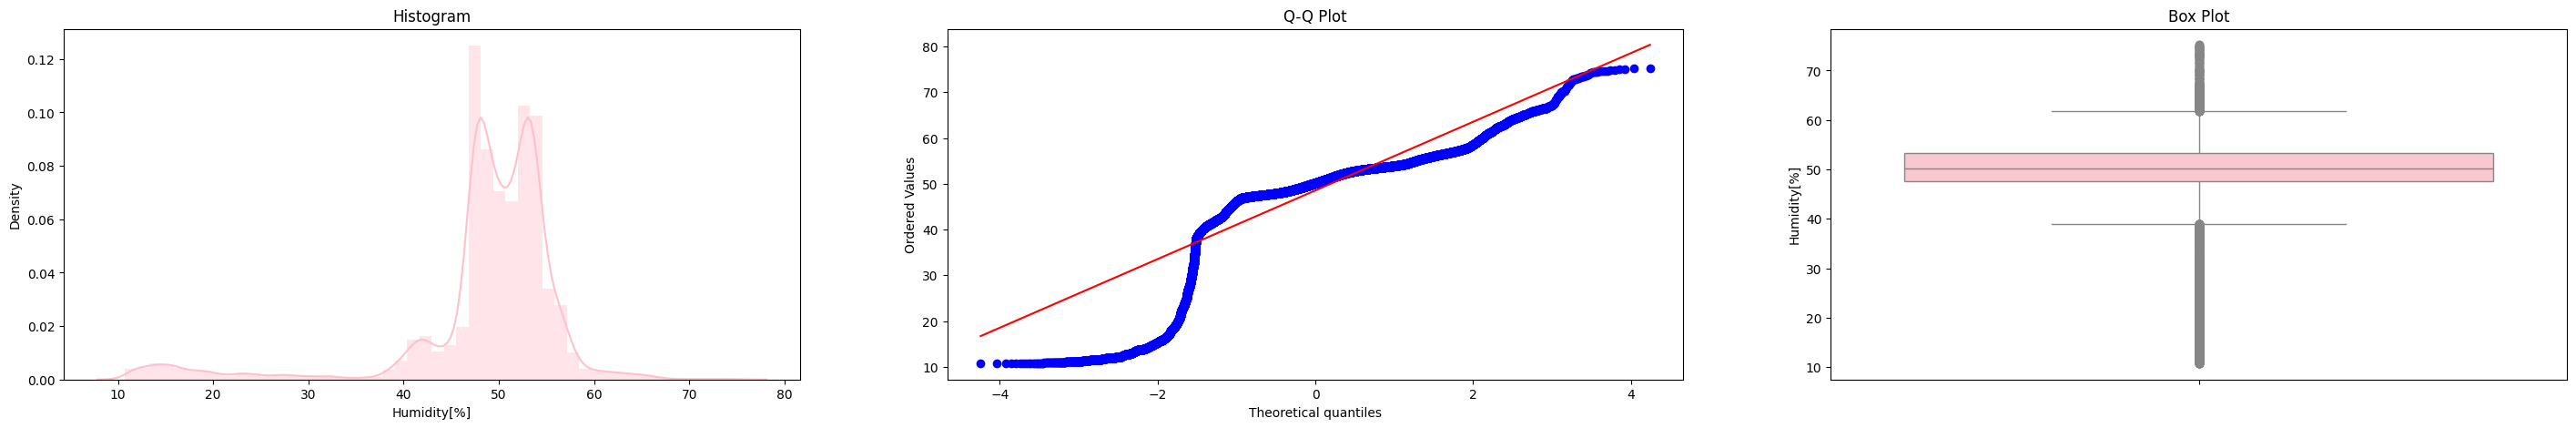

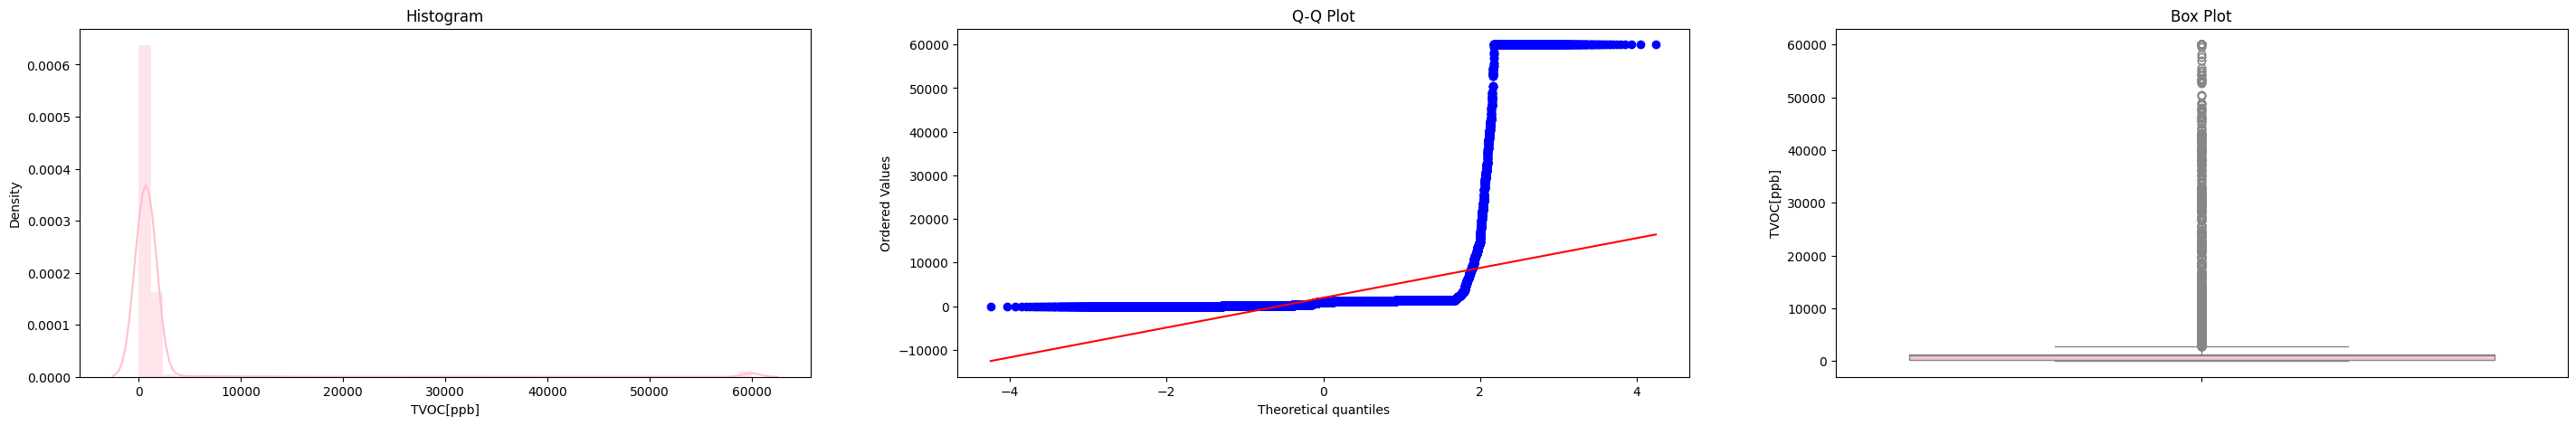

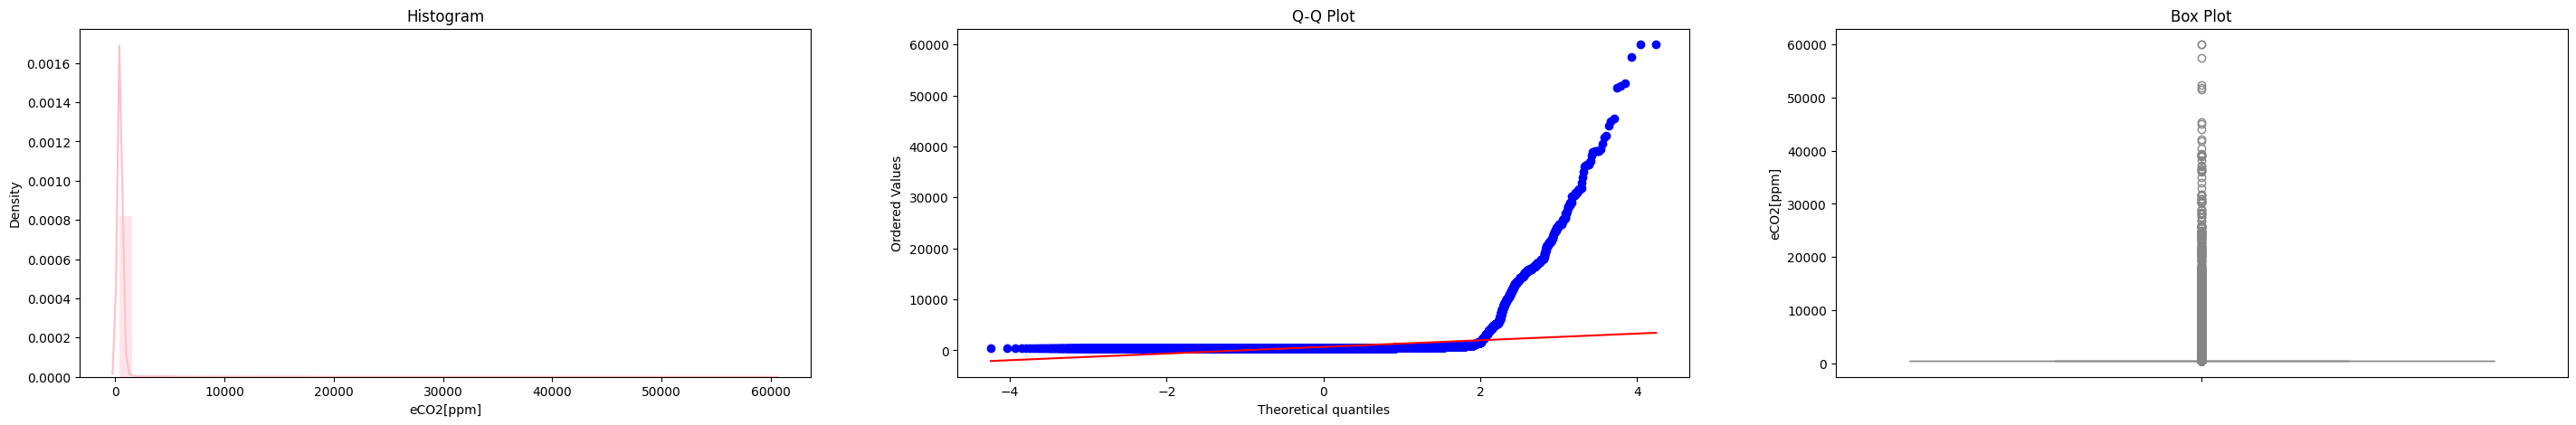

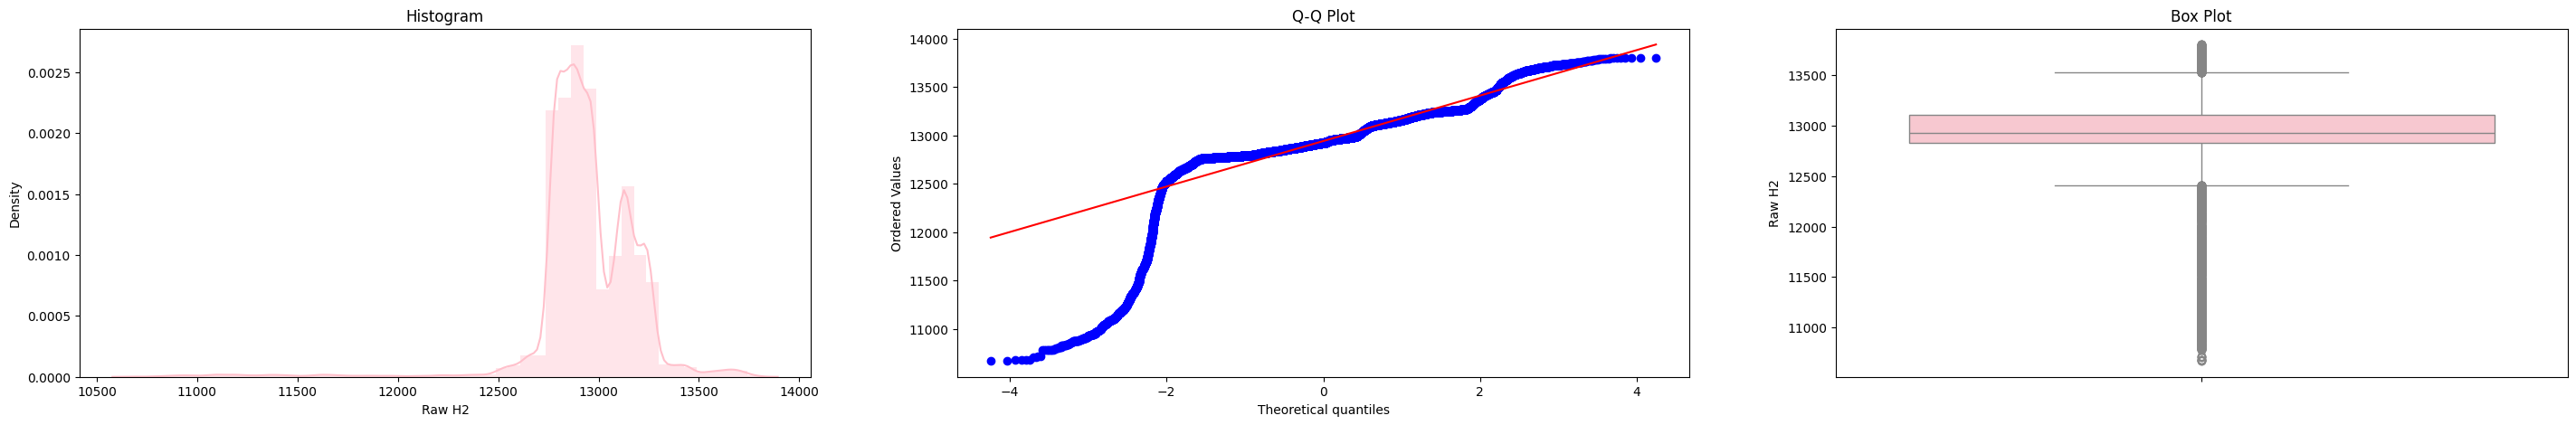

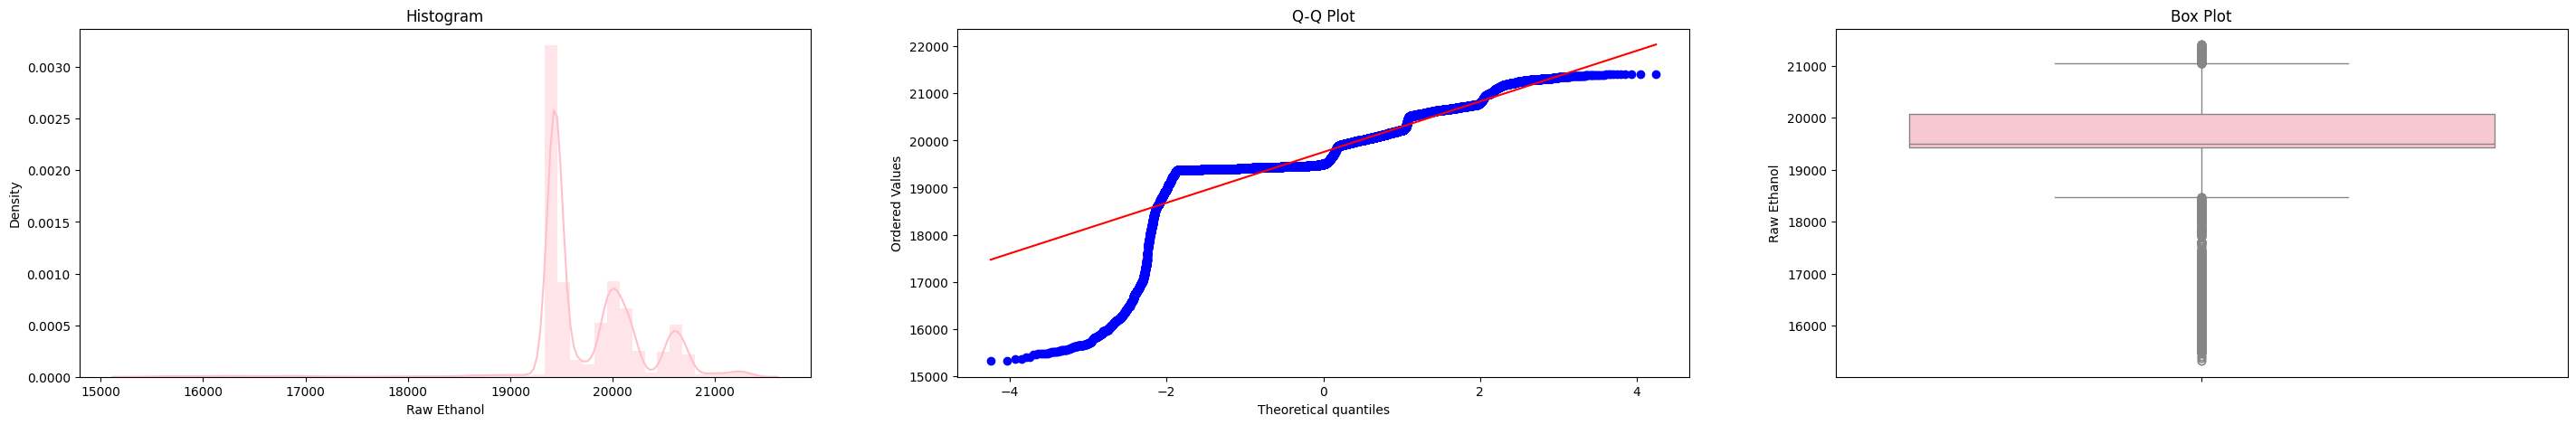

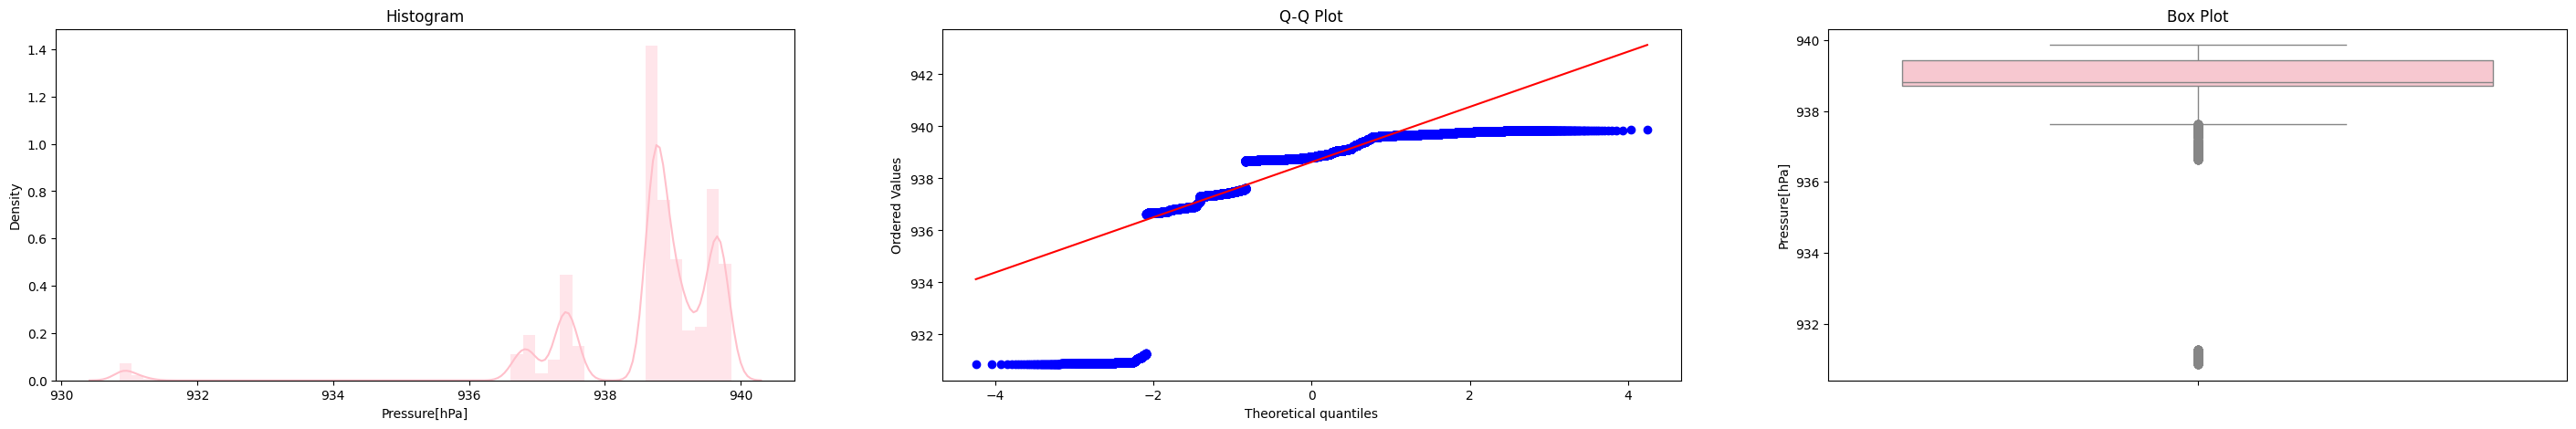

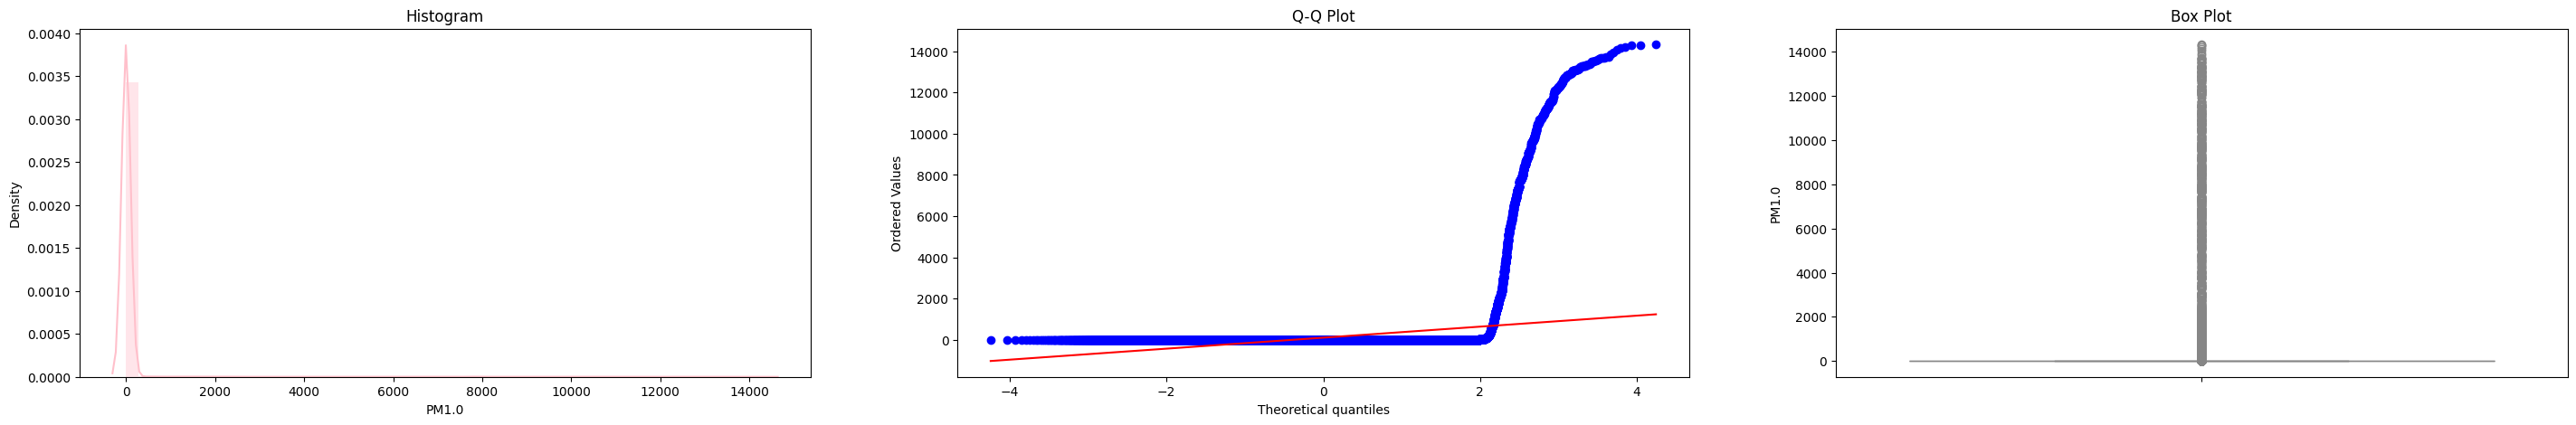

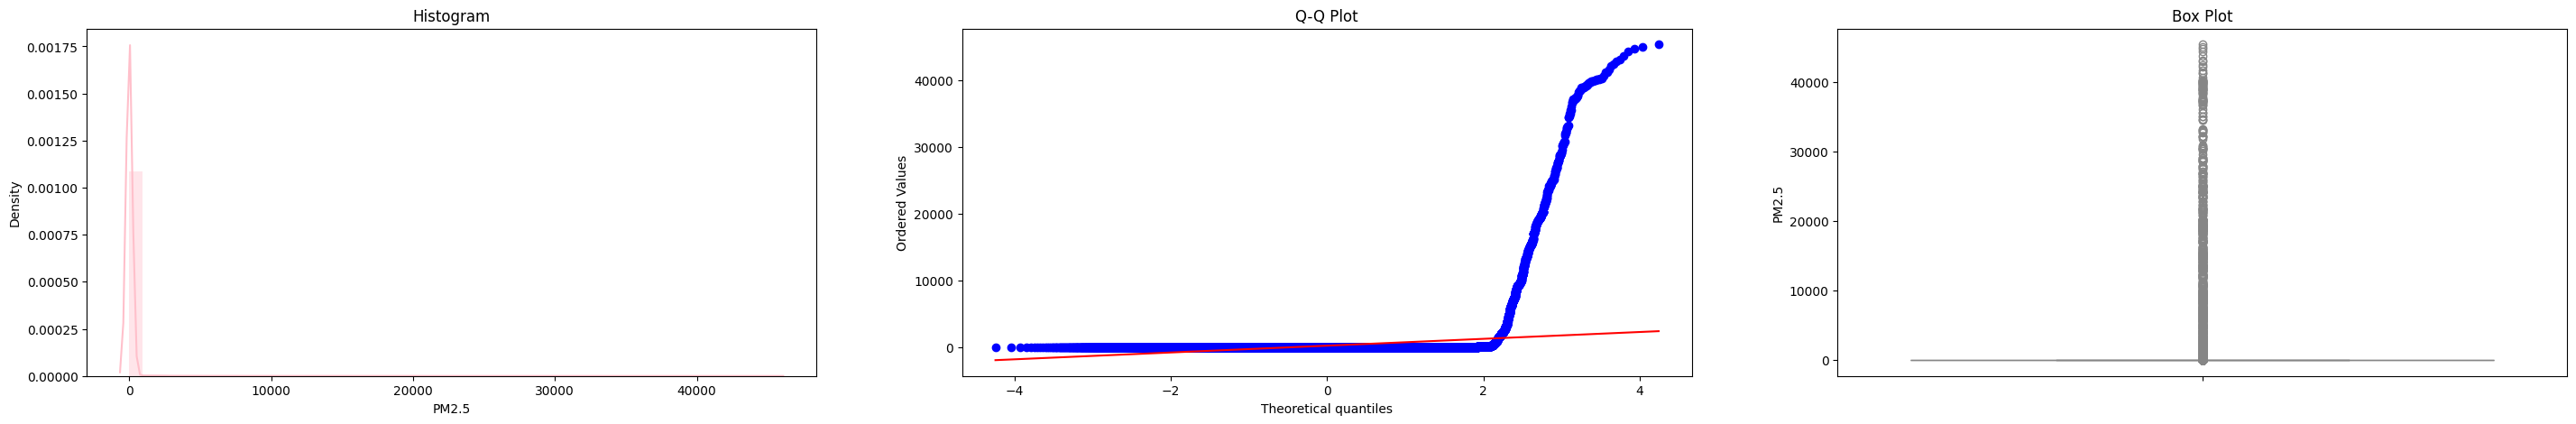

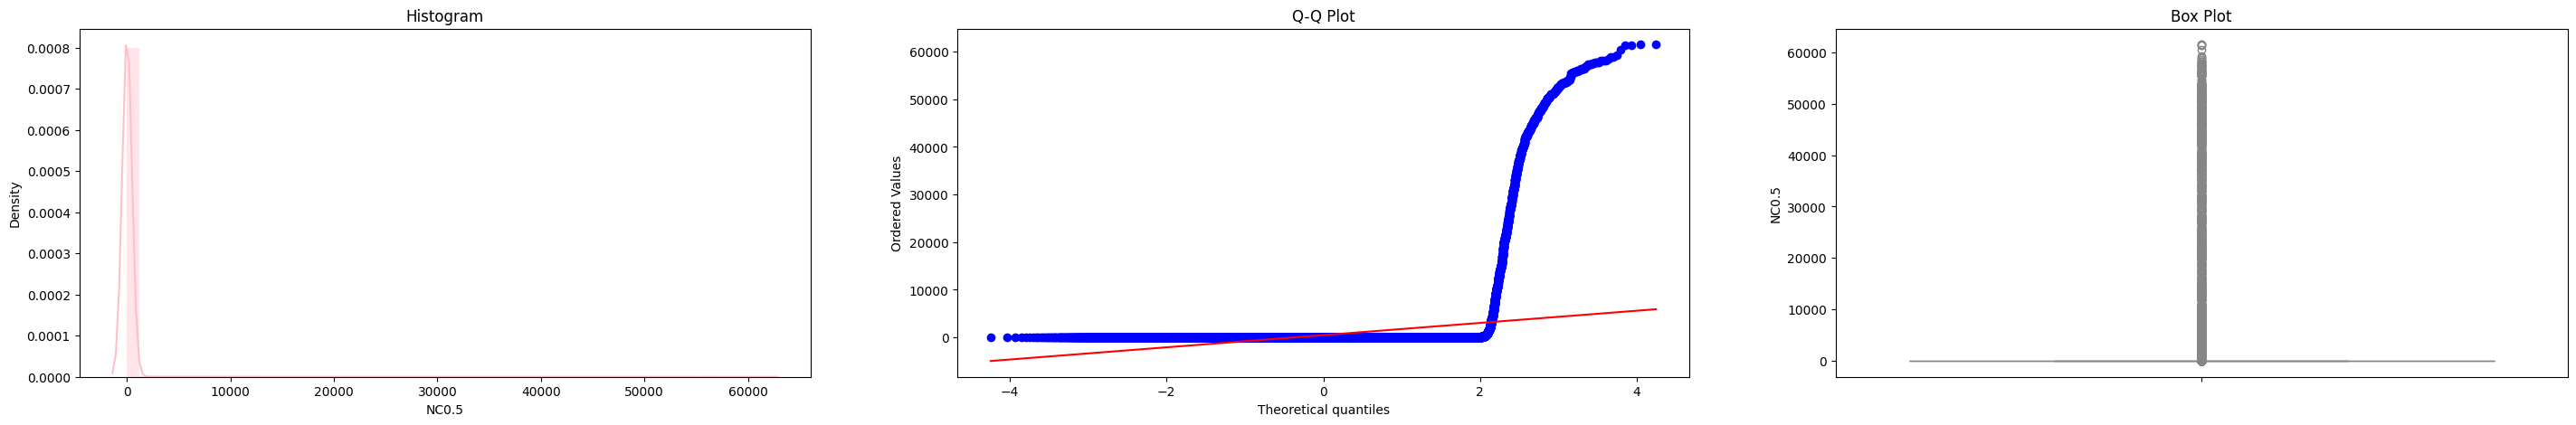

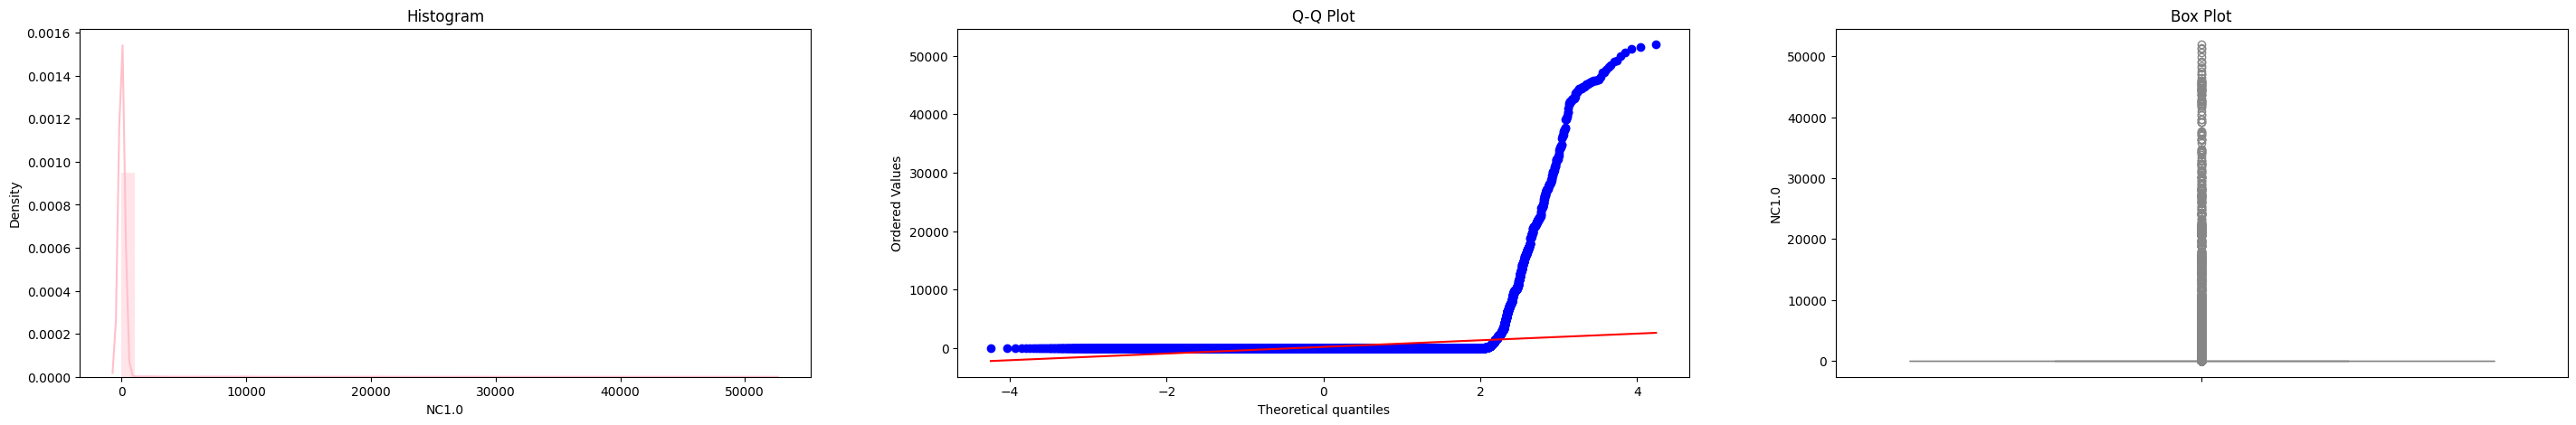

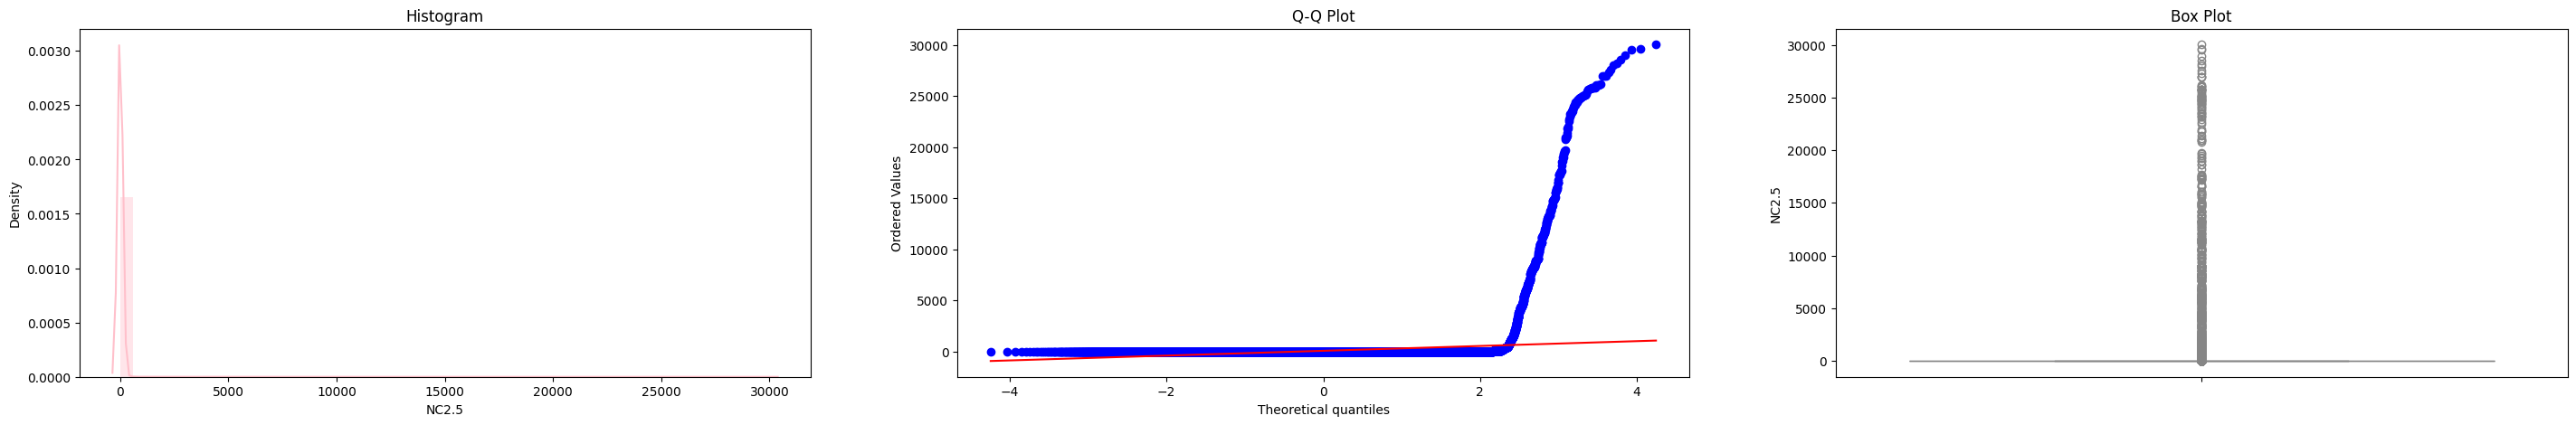

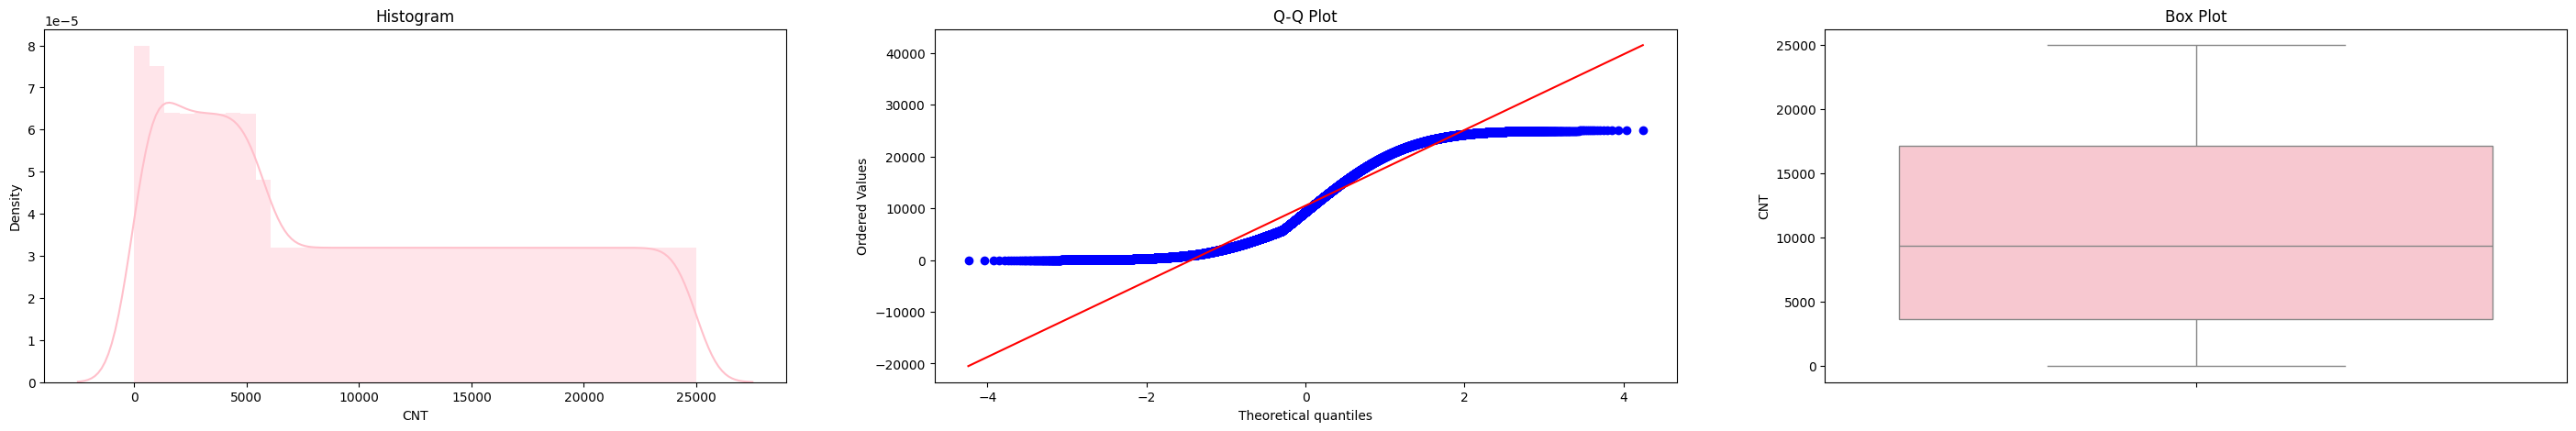

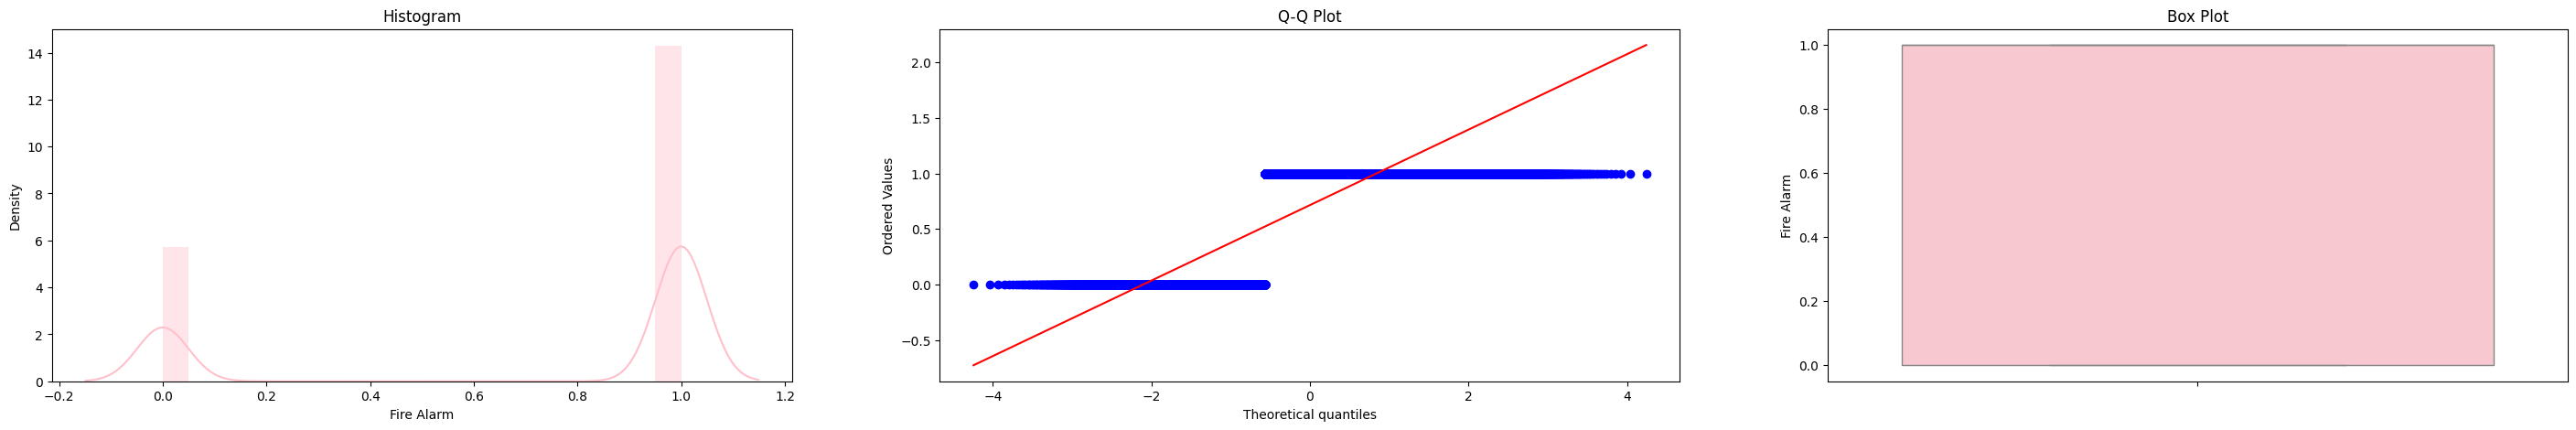

In [26]:
for col in df.columns:
    diagnostic_plot(df, col)

In [27]:
features = [feature for feature in df.columns if feature != "Fire Alarm"]

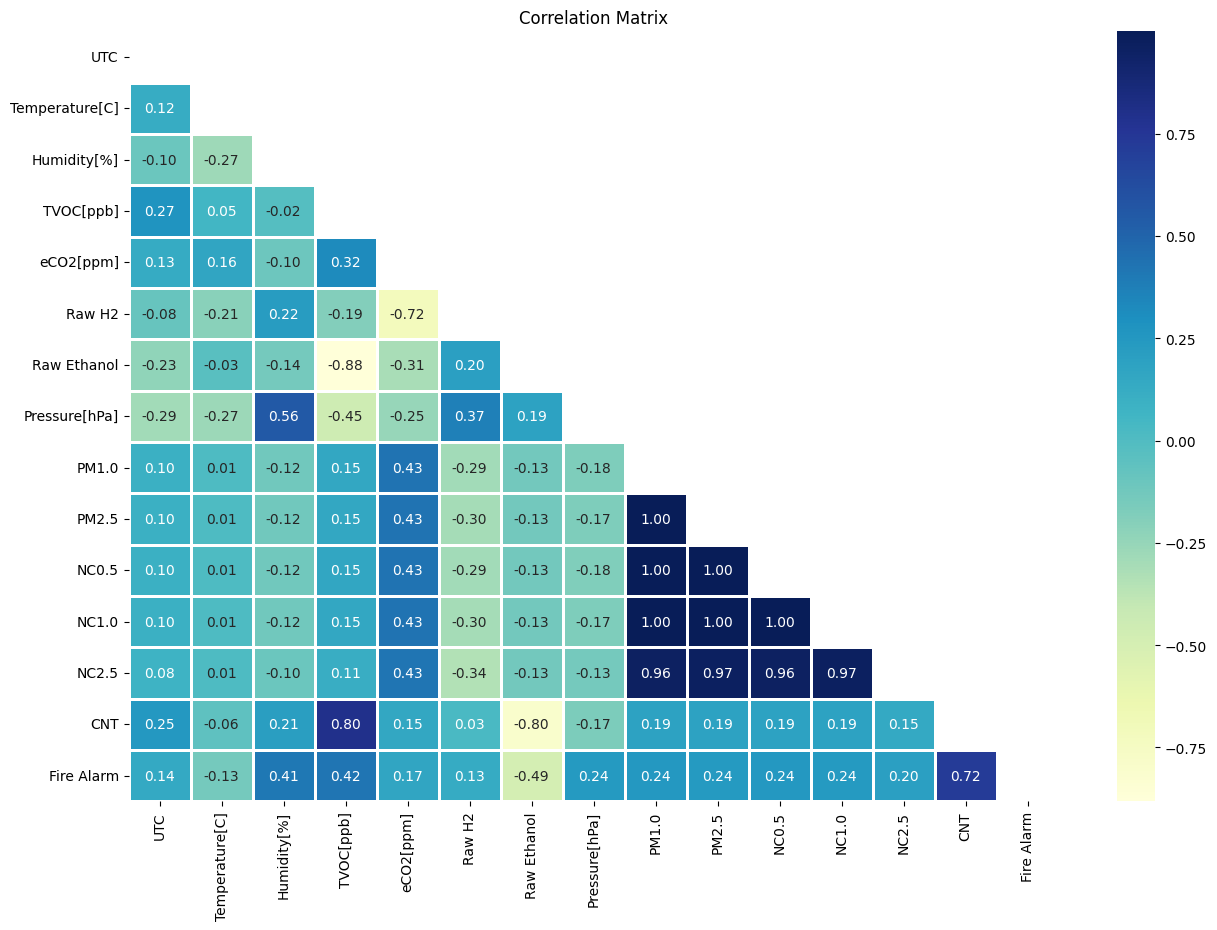

In [28]:
plt.figure(figsize=(15, 10))
corr = df.corr(method="spearman")
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(
    corr, mask=mask, annot=True, cmap="YlGnBu", linewidths=1, fmt=".2f"
)
cormat.set_title("Correlation Matrix")
plt.show()

As you can see the feature PM1.0, PM2.5, NO0.5 NC1.0 are highly correlated hence we have to drop some features to avoid multicollinearity

In [29]:
X = df.drop("Fire Alarm", axis=1)
X.corr(method="spearman")

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
UTC,1.00,0.12,-0.10,0.27,0.13,-0.08,-0.23,-0.29,0.10,0.10,0.10,0.10,0.08,0.25
Temperature[C],0.12,1.00,-0.27,0.05,0.16,-0.21,-0.03,-0.27,0.01,0.01,0.01,0.01,0.01,-0.06
Humidity[%],-0.10,-0.27,1.00,-0.02,-0.10,0.22,-0.14,0.56,-0.12,-0.12,-0.12,-0.12,-0.10,0.21
TVOC[ppb],0.27,0.05,-0.02,1.00,0.32,-0.19,-0.88,-0.45,0.15,0.15,0.15,0.15,0.11,0.80
eCO2[ppm],0.13,0.16,-0.10,0.32,1.00,-0.72,-0.31,-0.25,0.43,0.43,0.43,0.43,0.43,0.15
Raw H2,-0.08,-0.21,0.22,-0.19,-0.72,1.00,0.20,0.37,-0.29,-0.30,-0.29,-0.30,-0.34,0.03
Raw Ethanol,-0.23,-0.03,-0.14,-0.88,-0.31,0.20,1.00,0.19,-0.13,-0.13,-0.13,-0.13,-0.13,-0.80
Pressure[hPa],-0.29,-0.27,0.56,-0.45,-0.25,0.37,0.19,1.00,-0.18,-0.17,-0.18,-0.17,-0.13,-0.17
PM1.0,0.10,0.01,-0.12,0.15,0.43,-0.29,-0.13,-0.18,1.00,1.00,1.00,1.00,0.96,0.19
PM2.5,0.10,0.01,-0.12,0.15,0.43,-0.30,-0.13,-0.17,1.00,1.00,1.00,1.00,0.97,0.19


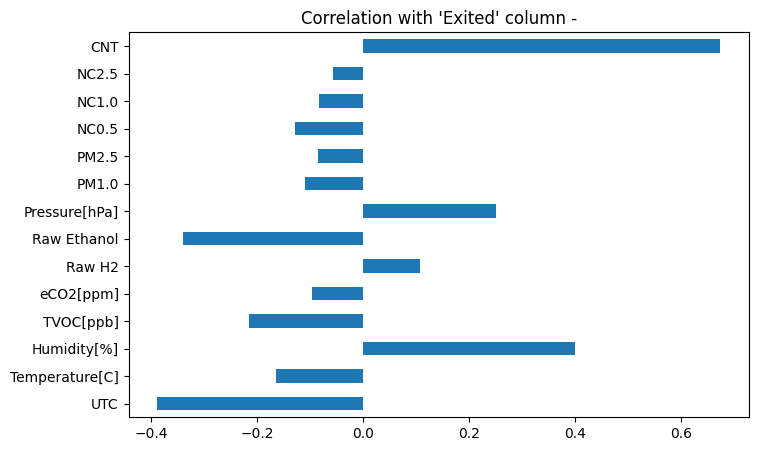

In [30]:
plt.figure(figsize=(8, 5))
X.corrwith(df["Fire Alarm"]).plot(
    kind="barh", title="Correlation with 'Exited' column -"
)
plt.show()

In [31]:
df.columns

Index(['UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]',
       'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [32]:
df.drop("UTC", axis=1, inplace=True)
df.drop("NC1.0", axis=1, inplace=True)
df.drop("NC0.5", axis=1, inplace=True)
df.drop("PM2.5", axis=1, inplace=True)
df.drop("CNT", axis=1, inplace=True)

In [33]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC2.5,Fire Alarm
0,20.00,57.36,0,400,12306,18520,939.74,0.00,0.00,0
1,20.02,56.67,0,400,12345,18651,939.74,0.00,0.00,0
2,20.03,55.96,0,400,12374,18764,939.74,0.00,0.00,0
3,20.04,55.28,0,400,12390,18849,939.74,0.00,0.00,0
4,20.06,54.69,0,400,12403,18921,939.74,0.00,0.00,0


In [34]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
df_scaled = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
df_scaled.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC2.5,Fire Alarm
0,0.51,0.72,0.00,0.00,0.52,0.53,0.99,0.00,0.00,0.00
1,0.51,0.71,0.00,0.00,0.53,0.55,0.99,0.00,0.00,0.00
2,0.51,0.70,0.00,0.00,0.54,0.57,0.99,0.00,0.00,0.00
3,0.51,0.69,0.00,0.00,0.55,0.58,0.99,0.00,0.00,0.00
4,0.51,0.68,0.00,0.00,0.55,0.59,0.99,0.00,0.00,0.00


In [35]:
x = df.iloc[:, :-1]

In [36]:
x

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,NC2.5
0,20.00,57.36,0,400,12306,18520,939.74,0.00,0.00
1,20.02,56.67,0,400,12345,18651,939.74,0.00,0.00
2,20.03,55.96,0,400,12374,18764,939.74,0.00,0.00
3,20.04,55.28,0,400,12390,18849,939.74,0.00,0.00
4,20.06,54.69,0,400,12403,18921,939.74,0.00,0.00
...,...,...,...,...,...,...,...,...,...
62625,18.44,15.79,625,400,13723,20569,936.67,0.63,0.01
62626,18.65,15.87,612,400,13731,20588,936.68,0.61,0.01
62627,18.87,15.84,627,400,13725,20582,936.69,0.57,0.01
62628,19.08,16.04,638,400,13712,20566,936.68,0.57,0.01


In [37]:
y = df.iloc[:, -1:]

In [38]:
y

,Fire Alarm
0,0
1,0
2,0
3,0
4,0
...,...
62625,0
62626,0
62627,0
62628,0


In [39]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=0
)

In [40]:
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("Y_train:", y_train.shape)
print("Y_test:", y_test.shape)

X_train: (46972, 9)
X_test: (15658, 9)
Y_train: (46972, 1)
Y_test: (15658, 1)


## Running the Random Forest Model

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rd = RandomForestClassifier()

In [43]:
rd.fit(x_train, y_train)

RandomForestClassifier()

In [45]:
y_predict = rd.predict(x_test)

In [65]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_predict)

0.9999551368326605

In [66]:
parameters = {
    "n_estimators": [50, 100, 200, 400],
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [1, 5, 10, None],
    "max_features": ["sqrt", "log2", None],
}

In [67]:
from sklearn.model_selection import RandomizedSearchCV

rsc = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=parameters,
    cv=5,
    n_iter=10,
    verbose=1,
    scoring="roc_auc",
)

In [68]:
rsc.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [1, 5, 10, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'n_estimators': [50, 100, 200, 400]},
                   scoring='roc_auc', verbose=1)

In [69]:
print("Best parameters : ", rsc.best_params_)
print("Best score {:.2f} ".format(rsc.best_score_))

Best parameters :  {'n_estimators': 400, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy'}
Best scor 1.00 


In [46]:
from sklearn.metrics import accuracy_score, classification_report

In [47]:
print("Train accuracy :{:.2f}".format(accuracy_score(y_train, rd.predict(x_train))))
print("Test accuracy :{:.2f}".format(accuracy_score(y_test, rd.predict(x_test))))

Train accuracy :1.00
Test accuracy :1.00


In [48]:
dttrain = accuracy_score(y_train, rd.predict(x_train))
dttest = accuracy_score(y_test, rd.predict(x_test))

In [49]:
print(classification_report(y_predict, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4514
           1       1.00      1.00      1.00     11144

    accuracy                           1.00     15658
   macro avg       1.00      1.00      1.00     15658
weighted avg       1.00      1.00      1.00     15658



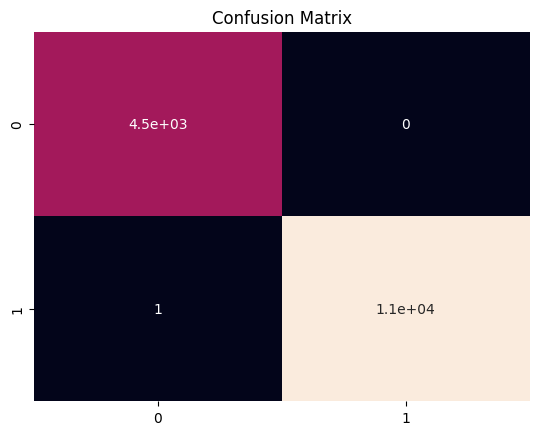

In [50]:
conmat = confusion_matrix(y_test, y_predict)
sns.heatmap(conmat, annot=True, cbar=False)
plt.title("Confusion Matrix")
plt.show()

In [71]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [52]:
feature_names = [feature for feature in df.columns if feature != "Fire Alarm"]

In [53]:
feature_names

['Temperature[C]',
 'Humidity[%]',
 'TVOC[ppb]',
 'eCO2[ppm]',
 'Raw H2',
 'Raw Ethanol',
 'Pressure[hPa]',
 'PM1.0',
 'NC2.5']

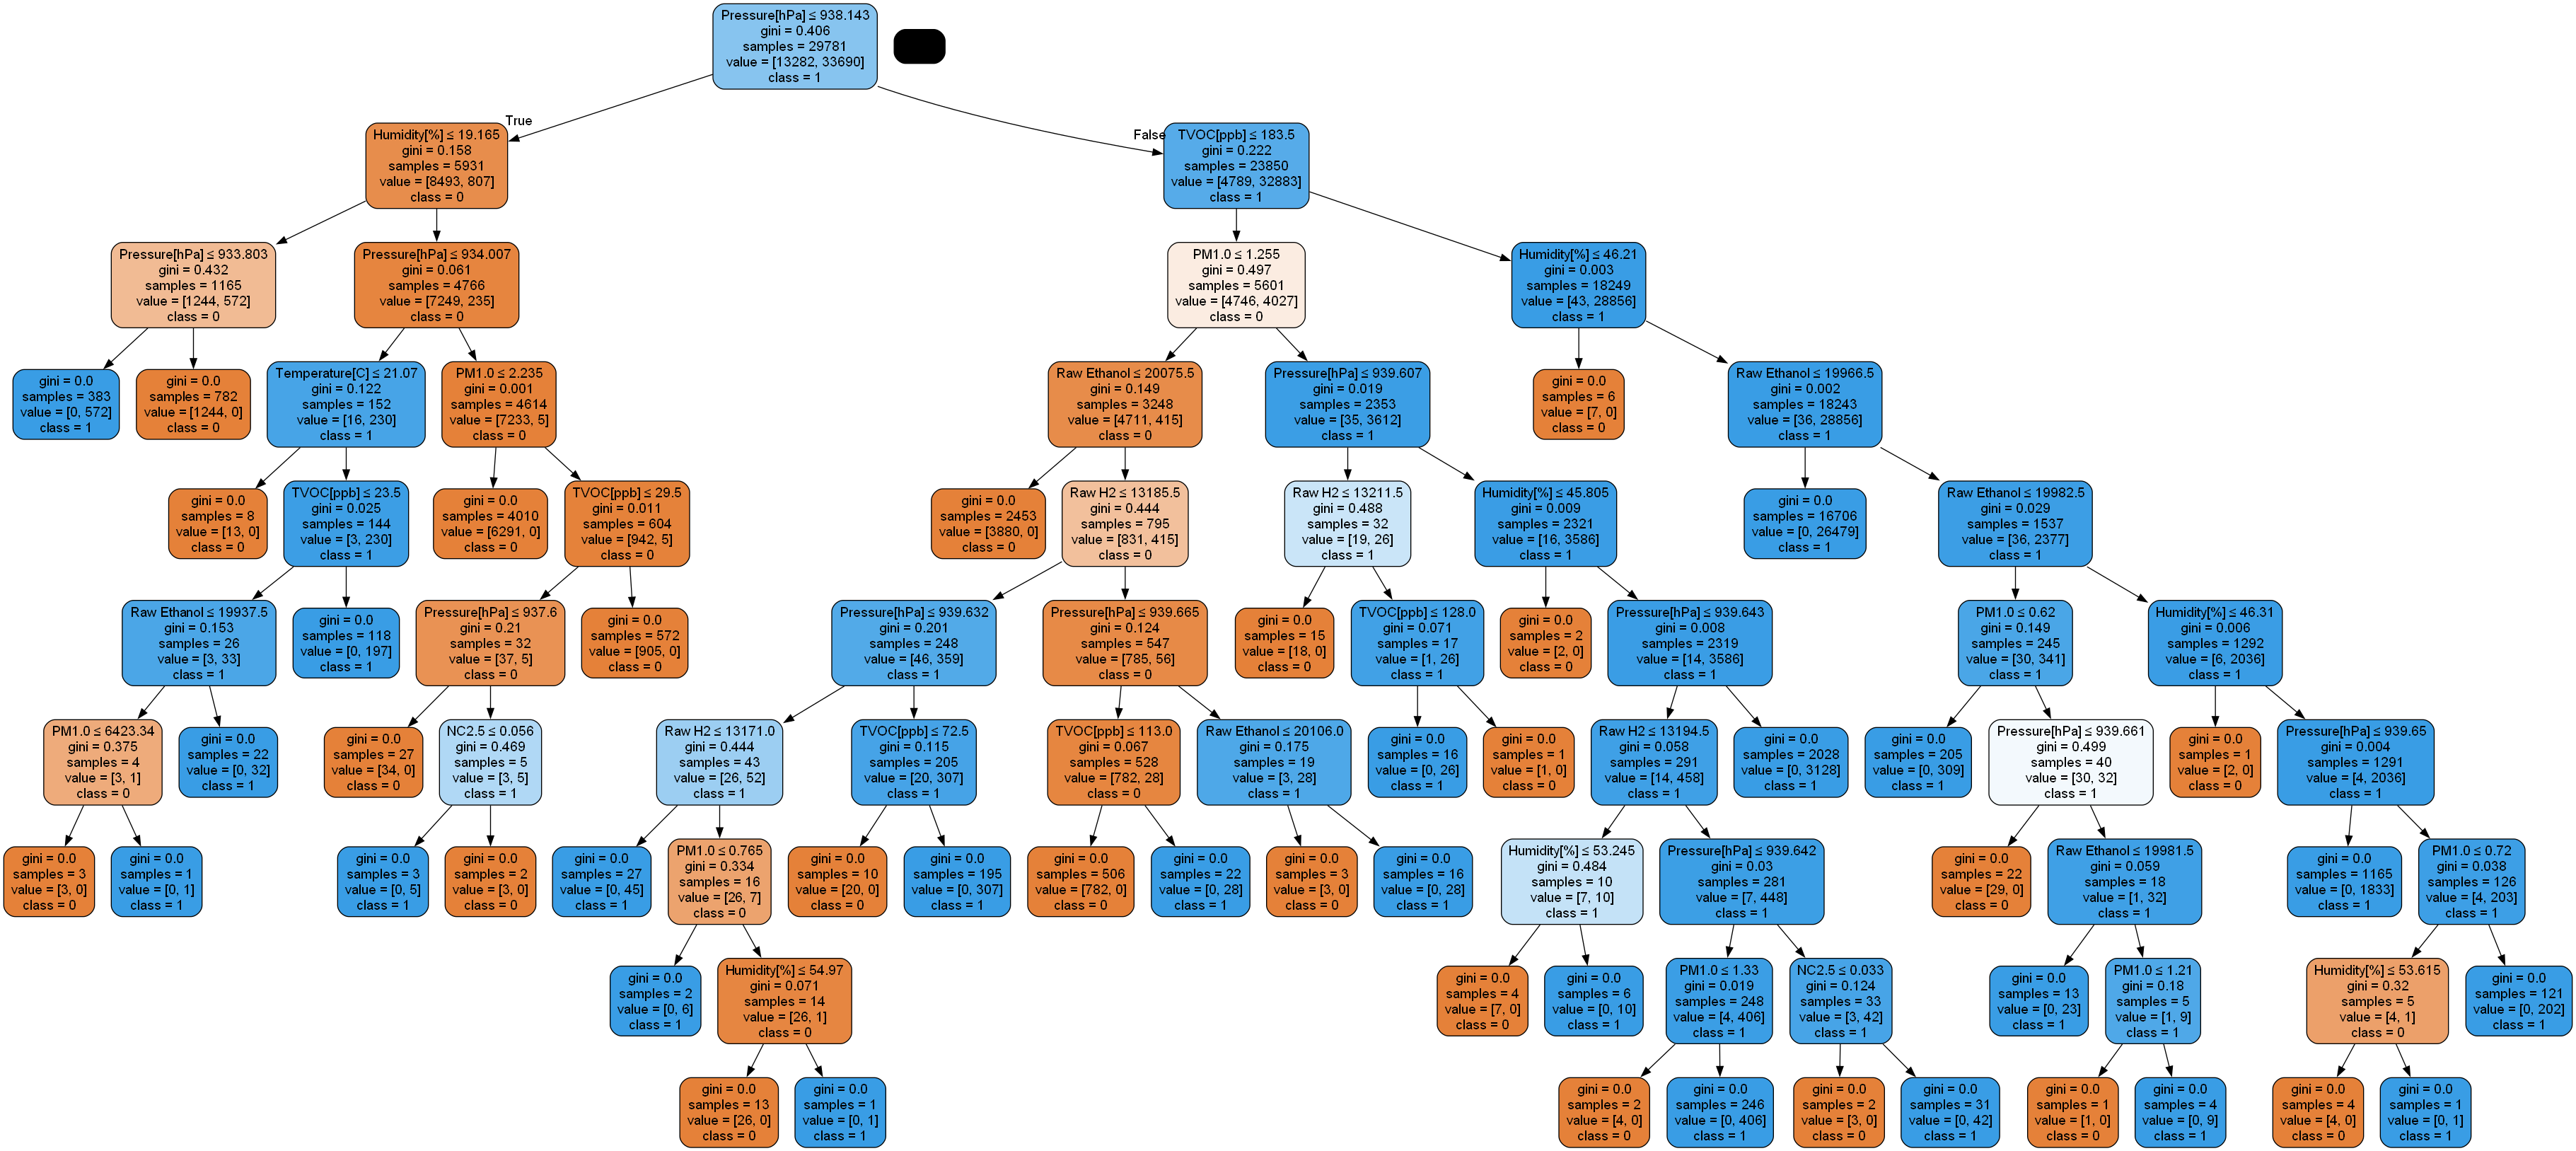

In [55]:
dot_data = StringIO()
export_graphviz(
    rd.estimators_[0],
    out_file=dot_data,
    filled=True,
    rounded=True,
    special_characters=True,
    feature_names=feature_names,
    class_names=["0", "1"],
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [57]:
from micromlgen import port

In [63]:
# print(port(rd, classmap={0: "0", 1: "1"}))
c_code = port(rd, classmap={0: "0", 1: "1"})
with open("rf-smoke-detector.h", "w") as file:
    file.write(c_code)

In [75]:
import joblib
import os

# Save the model to disk
joblib.dump(rd.estimators_[0 : rsc.best_params_["n_estimators"]], "random_forest_model.joblib")

# Get the size of the saved models
rf_size = os.path.getsize("random_forest_model.joblib")

print(f"Random Forest file size: {rf_size} bytes")

Random Forest file size: 996899 bytes
